

Proportion of good channels : 0.5361328125


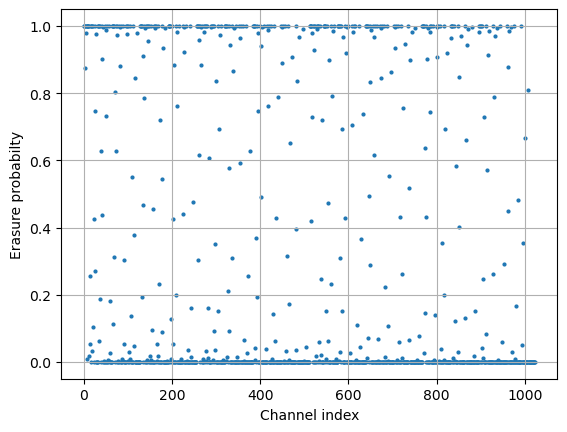

In [1]:
#%%  Polarization of binary erasure channel
import matplotlib.pyplot as plt
from itertools import product
from numpy import random

def polarize (a, b):
  return (1 - (1-a)*(1-b), a*b)

p_e = 0.3   # Erasure probability

m = 10   # number of stages

n = 2**m   # code length

erase_prob = [p_e for _ in range(n)]
k= 0
for k in range(m):
#    print(f"\nStage {k}", end = ": " )
    vectors = list(product([0,1], repeat=m-1))
    for u in vectors:
        v =  list(u[ : k]) + [0] +list(u[k :])
        v.reverse()
        v1 = list(map(lambda x : '1' if x==1 else '0', v))
        t  = int(''.join(v1),2)
#        print(f"({t}, {t+2**k})", end = " ")
#        print(erase_prob[t],erase_prob[t+2**k])
        p0 , p1 = polarize(erase_prob[t],erase_prob[t+2**k])
        erase_prob[t] = p0
        erase_prob[t+2**k] = p1
print("\n")        
   
#erase_prob.sort()
x = [i for i in range(n)]
plt.scatter(x, erase_prob, s=4)
plt.grid()
plt.xlabel('Channel index')
plt.ylabel('Erasure probabilty')


good = len([x for x in erase_prob if x < 0.001])/n

print(f"Proportion of good channels : {good}")


Text(0, 0.5, 'Erasure probabilty')

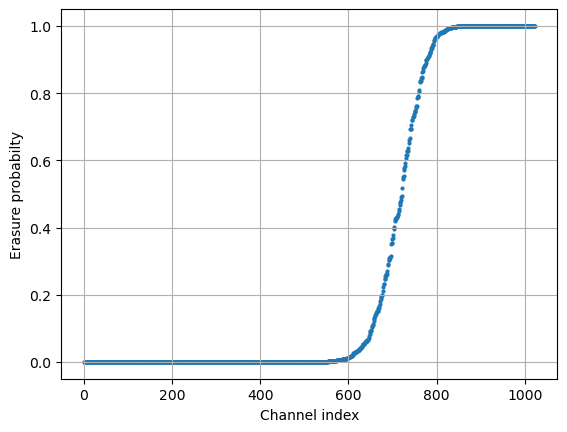

In [2]:
erase_prob.sort()
x = [i for i in range(n)]
plt.scatter(x, erase_prob, s=4)
plt.grid()
plt.xlabel('Channel index')
plt.ylabel('Erasure probabilty')